In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Q1. Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio test. The function should return the F-value and the corresponding p-value for the test.

In [10]:
def variance_ratio(arr1, arr2):
    # Calculating the variance of the 2 arrays
    var1 = np.var(arr1)
    var2 = np.var(arr2)

    # Calculating the f-value or the variance ratio between 2 arrays of data
    f_val = var1 / var2

    # Calculating degrees of freedom of the 2 dataset
    df1 = len(arr1) - 1
    df2 = len(arr2) - 1

    # Calculating the p_value corresponding the f_value calculated above
    p_val = stats.f.cdf(x = f_val, dfn = df1, dfd = df2)
    
    return (f_val, p_val)    

In [11]:
# Declaring 2 arrays
arr1 = np.linspace(1, 100, 20)
arr2 = np.linspace(10, 80, 20)

f_val, p_val = variance_ratio(arr1, arr2)

print("The F-value is:", round(f_val, 4))
print("Corresponding p_value is:", round(p_val,4))

The F-value is: 2.0002
Corresponding p_value is: 0.9301


## Q2. Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an F-distribution, write a Python function that returns the critical F-value for a two-tailed test.

In [12]:
def f_critical_val(dfn, dfd, alpha, tail):
    if tail == 1:
        critical_val = stats.f.ppf(q = 1 - alpha, dfn = dfn, dfd = dfd)            
    else:
        critical_val = stats.f.ppf(q = 1 - alpha / 2, dfn = dfn, dfd = dfd)
    return critical_val

In [13]:
alpha = 0.05 # given
dfn = 10
dfd = 15
tail = 2

critical_val = f_critical_val(dfn, dfd, alpha, tail)
print(f"The critical F-value for {tail}ed test is: {round(critical_val, 4)}")

The critical F-value for 2ed test is: 3.0602


## Q3. Write a Python program that generates random samples from two normal distributions with known variances and uses an F-test to determine if the variances are equal. The program should output the F-value, degrees of freedom, and p-value for the test.

In [14]:
def f_val_random_sample(std1, std2):
    np.random.seed(42)
    
    arr1 = np.random.normal(loc = 10, scale = std1, size = 100)
    arr2 = np.random.normal(loc = 15, scale = std2, size = 50)
    
    null_hypo = "Variances of the 2 random samples are equal"
    alt_hypo = "Variances of the 2 random samples are not equal"
    
    var1 = np.var(arr1)
    var2 = np.var(arr2)
    
    f_val = var1 / var2
    
    #  Calculating Degrees of Freedom
    dfn = len(arr1) - 1
    dfd = len(arr2) - 1
    
    # Declaring significance value
    alpha = 0.05
    
    p_val = stats.f.cdf(x = f_val, dfn = dfn, dfd = dfd)
    
    critical_val = stats.f.ppf(q = 1 - alpha / 2, dfn = dfn, dfd = dfd)
    
    if f_val > critical_val:
        return (alt_hypo, f_val, dfn, dfd, p_val)
    else:
        return (null_hypo, f_val, dfn, dfd, p_val)

In [15]:
variance1 = 10
std1 = np.sqrt(variance1)

variance2 = 8
std2 = np.sqrt(variance2)

accepted_hypo, f_val, dfn, dfd, p_val = f_val_random_sample(std1, std2)

print(f"The degree of freedom of sample1 is {dfn} and sample2 is {dfd}")
print(f"The F-value of the 2 samples is: {f_val}")
print(f"The corresponding p-value of the 2 samples is: {p_val}")
print(f"Conclusion:{accepted_hypo}")

The degree of freedom of sample1 is 99 and sample2 is 49
The F-value of the 2 samples is: 1.0101037690586694
The corresponding p-value of the 2 samples is: 0.5050473803250424
Conclusion:Variances of the 2 random samples are equal


## Q4.The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from each population. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.

In [16]:
var1 = 10
var2 = 15

arr1 = np.random.normal(loc = 10, scale = np.sqrt(var1), size = 50)
arr2 = np.random.normal(loc = 15, scale = np.sqrt(var2), size = 30)

sample1 = np.random.choice(arr1, size=12, replace=False)
sample2 = np.random.choice(arr2, size=12, replace=False)

alpha = 0.05

var1 = np.var(sample1)
var2 = np.var(sample2)

f_val = var1 / var2

dfn = len(sample1) - 1
dfd = len(sample2) - 1

critical_value = stats.f.ppf(q = 1- alpha / 2, dfn = dfn, dfd = dfd)

null_hypo = "The variances of the samples are not significantly different"
alt_hypo = "The variances of the samples are significantly different"

if f_val > critical_val:
    print("Reject the null hypothesis")
    print(f"Conclusion: {alt_hypo}")
else:
    print("Failed to Reject the null hypothesis")
    print(f"Conclusion: {null_hypo}")

Failed to Reject the null hypothesis
Conclusion: The variances of the samples are not significantly different


## Q5. A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25 products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance level to determine if the claim is justified.

In [19]:
null_hypo = "The variance of the diameter of a certain product is 0.005"
alt_hypo = "The variance of the diameter of a certain product is not 0.005"

pop_size = 100
pop_variance = 0.005
sample_size =25
sample_var = 0.006

f_stat = sample_var / pop_variance

dfn = sample_size - 1
dfd = pop_size - 1

alpha = 0.01

critical_val = stats.f.ppf(q = 1- alpha, dfn = dfn, dfd = dfd)

if f_stat <= critical_val:
    print("Failed to reject Null Hypothesis")
    print("Conclusion:", null_hypo)
else:
    print("Rejected Null Hypothesis")
    print("Conclusion:", alt_hypo)

Failed to reject Null Hypothesis
Conclusion: The variance of the diameter of a certain product is 0.005


## Q6. Write a Python function that takes in the degrees of freedom for the numerator and denominator of an F-distribution and calculates the mean and variance of the distribution. The function should return the mean and variance as a tuple.

The formula for Mean and Variance of F-distribution for degree $df_{1}$ and $df_{2}$ are as follows:

$$ Mean = \frac{df_{2}}{df_{2} - 2}, df_{2} > 2 $$

$$ Variance = \frac{2 * df_{2} ^ 2 * (df_{1} + df_{2} - 2)}{df_{1} * (df_{2} - 2) ^ 2 * (df_{2} - 4)}, df_{2} > 4 $$

In [22]:
def calculate_mean_variance(df1, df2):
    if df1 <= 0 or df2 <= 0:
        raise("Degree of freedom should be positive")
    if df2 > 2:
        mean = df2 / (df2 - 2)
    if df2 > 4:
        var = (2 * (df2 ** 2) * (df1 + df2 - 2)) / (df1 * ((df2 - 2) ** 2) * (df2 - 4) )
    return (mean, var)

In [23]:
dfn = 10
dfd = 25

mean, var = calculate_mean_variance(dfn, dfd)
print(f"The mean of the distribution is {mean} and the variance is {var}")

The mean of the distribution is 1.0869565217391304 and the variance is 0.37132055090467186


## Q7. A random sample of 10 measurements is taken from a normal population with unknown variance. The sample variance is found to be 25. Another random sample of 15 measurements is taken from another normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test at the 10% significance level to determine if the variances are significantly different.

In [25]:
sample1_size = 10
sample1_var = 25

sample2_size = 15
sample2_var = 20

alpha = 0.1

null_hypo = "The variances of the 2 populations are not significantly different"
alt_hypo = "The variances of the 2 populations are significantly different"

f_stat = sample1_var / sample2_var

dfn = sample1_size - 1
dfd = sample2_size - 1

critical_val = stats.f.ppf(q = 1 - alpha, dfn = dfn, dfd = dfd)

if f_stat <= critical_val:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)
else:
    print("Rejected the Null Hypothesis")
    print("Conclusion:", alt_hypo)

Failed to reject the Null Hypothesis
Conclusion: The variances of the 2 populations are not significantly different


## Q8. The following data represent the waiting times in minutes at two different restaurants on a Saturday night: Restaurant A: 24, 25, 28, 23, 22, 20, 27; Restaurant B: 31, 33, 35, 30, 32, 36. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.

In [33]:
restA = [24, 25, 28, 23, 22, 20, 27]
restB = [31, 33, 35, 30, 32, 36]

alpha = 0.05

varA = np.var(restA)
varB = np.var(restB)

f_test = varA / varB

dfn = len(restA) - 1
dfd = len(restB) - 1

critical_value = stats.f.ppf(q = 1 - alpha, dfn = dfn, dfd = dfd)

null_hypo = "The variance of the waiting time of the both the restaurants are not significantly different"
alt_hypo = "The variance of the waiting time of the both the restaurants are significantly different"

if f_test <= critical_value:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)
else:
    print("Rejected the Null Hypothesis")
    print("Conclusion:", alt_hypo)

Failed to reject the Null Hypothesis
Conclusion: The variance of the waiting time of the both the restaurants are not significantly different


### Plotting the Decision Boundary for the above problem

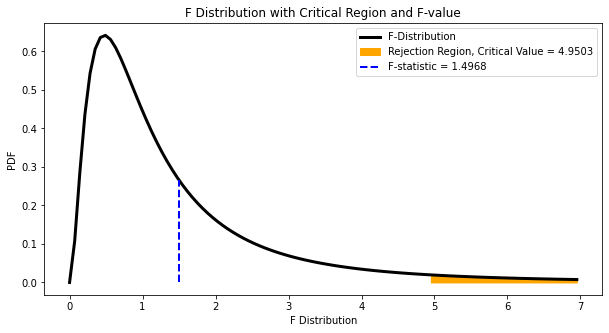

In [70]:
plt.figure(figsize=(10,5))

# Plotting the PDF
x = np.linspace(0, critical_value + 2, 100)
y = stats.f.pdf(x, dfn = dfn, dfd = dfd)

plt.plot(x, y, label = "F-Distribution", color = "black", linewidth = 3)

# Coloring the Critical Region and above
x_crit = np.linspace(critical_value, critical_value + 2, 100)
y_crit = stats.f.pdf(x_crit, dfn = dfn, dfd = dfd)
plt.fill_between(x = x_crit, y1 = y_crit, color = "orange", label = f"Rejection Region, Critical Value = {round(critical_value, 4)}")

# Plotting the F-statistics value we got
y_stat = stats.f.pdf(x = f_test, dfn = dfn, dfd = dfd)
plt.plot([f_test, f_test], [0, y_stat], 'b--', linewidth=2, label=f'F-statistic = {f_test:.4f}')

plt.title("F Distribution with Critical Region and F-value")
plt.xlabel("F Distribution")
plt.ylabel("PDF")
plt.legend()
plt.show()

## Q9. The following data represent the test scores of two groups of students: Group A: 80, 85, 90, 92, 87, 83; Group B: 75, 78, 82, 79, 81, 84. Conduct an F-test at the 1% significance level to determine if the variances are significantly different.

In [72]:
grpA = [80, 85, 90, 92, 87, 83]
grpB = [75, 78, 82, 79, 81, 84]

alpha = 0.001

null_hypo = "The variance of the 2 groups are not significantly different"
alt_hypo = "The variance of the 2 groups are significantly different"

f_stat = np.var(grpA) / np.var(grpB)

dfn = len(grpA) - 1
dfd = len(grpB) - 1

critical_value = stats.f.ppf(q = 1 - alpha, dfn = dfn, dfd = dfd)

if f_test <= critical_value:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)
else:
    print("Rejected the Null Hypothesis")
    print("Conclusion:", alt_hypo)

Failed to reject the Null Hypothesis
Conclusion: The variance of the 2 groups are not significantly different
